Team 10 - COS80027 - Assignment 3 - Final Project (Team Project)

Task 1 - Deep Learning - UCF101 Dataset - CNN+LSTM Model

Team Members worked on this code -

105501919 - Akshay Chavan

104841889 - Mohamed Shariq Usoof

104652159 - Ratanak Panha Duong

103128918 - Thi Ngan Ha Do

## Environment Setup.
- Decord is installed to load video frames efficiently
- Pytorch and TorchVision are imported for Deep Learning Models

In [ ]:
# Install decord library for video reading
!pip install decord

# Standard libraries
import os
import numpy as np
from PIL import Image
from IPython.display import display

# PyTorch core
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models

# Video processing
from decord import VideoReader, cpu

# Image and video transforms
from torchvision import transforms, models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 50.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Loading (only run once)
- The **UCF101 video dataset** and **Split Files** are downloaded and extracted.
- The dataset is stored in Google Drive under `/MyDrive/UCF101_DL/`

In [ ]:
# Define base directory path on Google Drive
base_dir = "/content/drive/MyDrive/UCF101_DL"
os.makedirs(base_dir, exist_ok=True)

In [ ]:
# Download the Dataset .rar file from the website
!wget -O /content/drive/MyDrive/UCF101_DL/UCF101.rar https://www.crcv.ucf.edu/data/UCF101/UCF101.rar --no-check-certificate

--2025-05-29 09:27:02--  https://www.crcv.ucf.edu/data/UCF101/UCF101.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 6932971618 (6.5G) [application/x-rar-compressed]
Saving to: ‘/content/drive/MyDrive/UCF101_DL/UCF101.rar’

/content/drive/MyDr 100%[===================>]   6.46G  46.7MB/s    in 2m 34s  

2025-05-29 09:29:37 (42.9 MB/s) - ‘/content/drive/MyDrive/UCF101_DL/UCF101.rar’ saved [6932971618/6932971618]



In [ ]:
# Download the Split .zip files from the website
!wget -O /content/drive/MyDrive/UCF101_DL/UCF101TrainTestSplits-RecognitionTask.zip https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip --no-check-certificate

--2025-05-29 09:29:37--  https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 113943 (111K) [application/zip]
Saving to: ‘/content/drive/MyDrive/UCF101_DL/UCF101TrainTestSplits-RecognitionTask.zip’

/content/drive/MyDr 100%[===================>] 111.27K  --.-KB/s    in 0.1s    

2025-05-29 09:29:37 (819 KB/s) - ‘/content/drive/MyDrive/UCF101_DL/UCF101TrainTestSplits-RecognitionTask.zip’ saved [113943/113943]



In [ ]:
# Install unrar if not present, used for for extracting .rar files
!apt install unrar

# Unrar (extract) the dataset
!unrar x /content/drive/MyDrive/UCF101_DL/UCF101.rar /content/UCF101/

# Unzip the Train/Test Splits Files
!unzip /content/drive/MyDrive/UCF101_DL/UCF101TrainTestSplits-RecognitionTask.zip -d /content/drive/MyDrive/UCF101_DL/

Streaming output truncated to the last 5000 lines.
Extracting  /content/drive/MyDrive/UCF101_DL/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c07.avi      62%  OK 
Extracting  /content/drive/MyDrive/UCF101_DL/UCF-101/PlayingGuitar/v_PlayingGuitar_g08_c01.avi      62%  OK 
Extracting  /content/drive/MyDrive/UCF101_DL/UCF-101/PlayingGuitar/v_PlayingGuitar_g08_c02.avi      62%  OK 
Extracting  /content/drive/MyDrive/UCF101_DL/UCF-101/PlayingGuitar/v_PlayingGuitar_g08_c03.avi      62%  OK 
Extracting  /content/drive/MyDrive/UCF101_DL/UCF-101/PlayingGuitar/v_PlayingGuitar_g08_c04.avi      62%  OK 
Extracting  /content/drive/MyDrive/UCF101_DL/UCF-101/PlayingGuitar/v_PlayingGuitar_g08_c05.avi      62%  OK 
Extracting  /content/drive/MyDrive/UCF101_DL/UCF-101/PlayingGuitar/v_PlayingGuitar_g08_c06.avi      62%  OK 
Extracting  /content/drive/MyDrive/UCF101_DL/UCF-101/PlayingGuitar/v_PlayingGuitar_g08_c07.avi      62%  OK 
Extra

In [ ]:
# Unrar (extract) the dataset
!unrar x /content/drive/MyDrive/UCF101_DL/UCF101.rar /content/UCF101/

Streaming output truncated to the last 5000 lines.
Extracting  /content/UCF101/UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c05.avi      62%  OK 
Extracting  /content/UCF101/UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c06.avi      62%  OK 
Extracting  /content/UCF101/UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c07.avi      62%  OK 
Extracting  /content/UCF101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c01.avi      62%  OK 
Extracting  /content/UCF101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c02.avi      62%  OK 
Extracting  /content/UCF101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c03.avi      62%  OK 
Extracting  /content/UCF101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c04.avi      62%  OK 
Extracting  /content/UCF101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c05.avi      62%  OK 
Extracting  /content/UCF101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c06.avi      62%  OK 
Extracting  /content/UCF101/UCF-101/Play

### Map Class Names to Label Indices
- Extracts all **action class folders** and creates a mapping like:
  `{'Basketball': 0, 'Biking': 1, ...}`.

In [ ]:
# Directory containing videos per class
root_dir = "/content/UCF101/UCF-101"

# Automatically find all folders (classes)
all_classes = sorted([d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))])

# Map each class name to a label index
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(all_classes)}

print("Number of classes found:", len(class_to_idx))
print("Sample mapping:", list(class_to_idx.items())[:105])

Number of classes found: 101
Sample mapping: [('ApplyEyeMakeup', 0), ('ApplyLipstick', 1), ('Archery', 2), ('BabyCrawling', 3), ('BalanceBeam', 4), ('BandMarching', 5), ('BaseballPitch', 6), ('Basketball', 7), ('BasketballDunk', 8), ('BenchPress', 9), ('Biking', 10), ('Billiards', 11), ('BlowDryHair', 12), ('BlowingCandles', 13), ('BodyWeightSquats', 14), ('Bowling', 15), ('BoxingPunchingBag', 16), ('BoxingSpeedBag', 17), ('BreastStroke', 18), ('BrushingTeeth', 19), ('CleanAndJerk', 20), ('CliffDiving', 21), ('CricketBowling', 22), ('CricketShot', 23), ('CuttingInKitchen', 24), ('Diving', 25), ('Drumming', 26), ('Fencing', 27), ('FieldHockeyPenalty', 28), ('FloorGymnastics', 29), ('FrisbeeCatch', 30), ('FrontCrawl', 31), ('GolfSwing', 32), ('Haircut', 33), ('HammerThrow', 34), ('Hammering', 35), ('HandstandPushups', 36), ('HandstandWalking', 37), ('HeadMassage', 38), ('HighJump', 39), ('HorseRace', 40), ('HorseRiding', 41), ('HulaHoop', 42), ('IceDancing', 43), ('JavelinThrow', 44), ('

###  Load Train/Test Lists
- Loads paths from UCF official split files.
- Selecting **3 classes from each category** (e.g., sports, musical instruments, etc.) to meet assignment guidelines.

- Re-maps labels to the filtered 15 classes.

In [ ]:
# Defining Directories and Split Paths
split_dir = "/content/drive/MyDrive/UCF101_DL/ucfTrainTestlist"

train_split_file = os.path.join(split_dir, "trainlist01.txt")
test_split_file = os.path.join(split_dir, "testlist01.txt")
class_index_file = os.path.join(split_dir, "classInd.txt")

# Only selecting 15 classes across 5 categories (3 per category)
selected_classes = [
    'BasketballDunk', 'GolfSwing', 'TennisSwing',
    'PlayingPiano', 'PlayingGuitar', 'PlayingCello',
    'BrushingTeeth', 'Typing', 'ShavingBeard',
    'JumpingJack', 'Lunges', 'PushUps',
    'BoxingPunchingBag', 'SalsaSpin', 'HandstandWalking'
]

# Create class-to-index mapping (0 to 14)
class_to_idx = {cls: i for i, cls in enumerate(selected_classes)}

# Load classInd.txt to map original UCF labels to class names
idx_to_class = {}
with open(class_index_file, 'r') as f:
    for line in f:
        idx, class_name = line.strip().split()
        idx_to_class[int(idx) - 1] = class_name  # 0-indexed


# Video Label List Generation

# Filtered lists
train_video_label_list = []
val_video_label_list = []

# Parse training list
with open(train_split_file, "r") as f:
    for line in f:
        video_rel_path, original_label = line.strip().split()
        class_name = video_rel_path.split('/')[0]
        if class_name in selected_classes:
            full_path = os.path.join(root_dir, video_rel_path)
            mapped_label = class_to_idx[class_name]
            train_video_label_list.append((full_path, mapped_label))

# Parse testing list
with open(test_split_file, "r") as f:
    for line in f:
        video_rel_path = line.strip()
        class_name = video_rel_path.split('/')[0]
        if class_name in selected_classes:
            full_path = os.path.join(root_dir, video_rel_path)
            mapped_label = class_to_idx[class_name]
            val_video_label_list.append((full_path, mapped_label))

print(f"Train videos: {len(train_video_label_list)}")
print(f"Val videos:   {len(val_video_label_list)}")
print("Sample:", train_video_label_list[0])

Train videos: 1460
Val videos:   592
Sample: ('/content/UCF101/UCF-101/BasketballDunk/v_BasketballDunk_g08_c01.avi', 0)


### Data preprocessing: Frame extraction
- Loads videos, samples `num_frames`, applies transforms to each frame.
- Returns a 4D tensor: `[Time, Height, Width, Channel]` per video.

In [ ]:
# Inhereting Dataset base class from PyTorch

class UCF101Dataset(Dataset):

    # Using Constructor Method to take Video Label List of Tuples and Number of Frames
    def __init__(self, video_label_list, num_frames=16, transform=None):
        self.video_label_list = video_label_list
        self.num_frames = num_frames
        self.transform = transform or transforms.Compose([
            transforms.Resize((224, 224)),      # Resize frames to 224x224 (ResNet standard input)
            transforms.ToTensor(),              # Convert PIL image to Tensor: [H, W, C] → [C, H, W]
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])     # ImageNet normalization
        ])

    #  Tells PyTorch how many samples (videos) are in this dataset
    def __len__(self):
        return len(self.video_label_list)

    # Method when a specific video sample is requested
    def __getitem__(self, idx):
        video_path, label = self.video_label_list[idx]

        try:
            vr = VideoReader(video_path, ctx=cpu(0))        # Initializes decord.VideoReader to read the video frames
        except:
            raise RuntimeError(f"Failed to load video: {video_path}")

        # Gets total number of frames in the video
        total_frames = len(vr)

        # Selects num_frames evenly spaced indices from the video
        if total_frames < self.num_frames:
            indices = np.linspace(0, total_frames - 1, self.num_frames).astype(int)
        else:
            indices = np.linspace(0, total_frames - 1, self.num_frames).astype(int)

        #Reads the selected frams all at ocne, ans shapes as [Time, Height, Width, Channel]
        frames = vr.get_batch(indices).asnumpy()  # shape: (T, H, W, C)

        # Applies the transform pipeline to each frame
        processed = []
        for frame in frames:
            image = Image.fromarray(frame)
            processed.append(self.transform(image))

        # Combines the list of tensors into one 4D tensor
        # T: Number of frames (time steps)
        # C: Channels (3 for RGB)
        # H: Height (224)
        # W: Width (224)
        # This is the format expected by CNN+LSTM models.
        video_tensor = torch.stack(processed)

        return video_tensor, label

In [ ]:
# build DataLoader for training
# Wraps the custom dataset into PyTorch DataLoader objects
train_dataset = UCF101Dataset(train_video_label_list)
val_dataset = UCF101Dataset(val_video_label_list)

# Enables batch training, shuffling, and parallel loading (via num_workers)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=2)

## Model: CNN + LSTM
- CNN (ResNet18) extracts **spatial features** per frame.
- LSTM models **temporal sequence** of features across frames.
- Final Fully Connected layer classifies the video into one of 15 classes.


In [ ]:
class CNNLSTM(nn.Module):

    # Constructor to initialise the model's layer. HyperParameters used -
    # cnn_arch - string name of CNN backbone (resnet18)
    # hidden_dim - LSTM output size
    # num_layers - number of stacked LSTM layers
    # num_classes - number of output classes (15)
    # pretrained - whether to use a pretrained CNN (on ImageNet)

    def __init__(self, cnn_arch='resnet18', hidden_dim=256, num_layers=1, num_classes=15, pretrained=True):
        super(CNNLSTM, self).__init__()

        # Load a pretrained CNN (ResNet18) because pretrained=true
        base_model = models.__dict__[cnn_arch](pretrained=pretrained)

        # Removes the final classification layer (fc) from ResNet
        self.cnn = nn.Sequential(*list(base_model.children())[:-1])  # Outputs 512-dim feature vector. Shape: [Batch, 512, 1, 1]
        self.feature_dim = base_model.fc.in_features  # Stores Dimensionality 512 for resnet18

        # LSTM: processes temporal features over video frames
        # input_size - 512
        # hidden_size - 256
        # num_layers - 1
        # batch_first - Input shape: [batch, time, features]
        self.lstm = nn.LSTM(input_size=self.feature_dim, hidden_size=hidden_dim,
                            num_layers=num_layers, batch_first=True)

        # Fully Connected Output Final layer
        # Converts the LSTM output to logits of size [num_classes] (e.g., 15).
        self.fc = nn.Linear(hidden_dim, num_classes)

    # Automatically called whrn model(input)
    def forward(self, x):

        # Unpacks teh input Tensor Shape [Batch, T (Number of Frames), Channels, Height, Width]
        B, T, C, H, W = x.size()

        x = x.view(B * T, C, H, W)            # Merge batch and time expected by CNN input
        features = self.cnn(x)                # CNN Output Shape: [B*T, 512, 1, 1]
        features = features.view(B, T, -1)    # Reshape: [B, T, 512] expected for LSTM input

        lstm_out, _ = self.lstm(features)     # LSTM Output Shape: [B, T, hidden_dim]
        final_feature = lstm_out[:, -1, :]    # Use last time step: [B, hidden_dim]

        out = self.fc(final_feature)          # Final FC Shape: [B, num_classes]
        return out

## Training Configuration
- Uses GPU (`cuda`) if available.
- `CrossEntropyLoss` is ideal for multi-class classification.
- `Adam` optimizer used for adaptive learning rate updates.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNNLSTM(num_classes=15).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 136MB/s]


## Training Loop
- Trains model for `num_epochs`.
- Logs **average training loss** and **validation accuracy** per epoch.
- Uses `model.train()` and `model.eval()` appropriately for mode switching.


In [ ]:
# Defines the function to train the model.
import time

def train_model(model,          # CNN+LSTM Model
                train_loader,   # batches of training data
                val_loader,     # batches of validation data
                criterion,      # loss function
                optimizer,      # parameter optimizer (Adam)
                num_epochs=10   # number of full passes over training data
                ):
    train_losses = []     # Initialise List to store Average training loss per epoch
    val_accuracies = []   # Initialise List to store Validation accuracy per epoch
    epoch_times = []

    # To store the best value of epoch for plots
    best_val_acc = 0.0
    best_epoch = -1
    best_model_wts = model.state_dict()  # Store best weights

    # Set up Loop for each number of epochs
    for epoch in range(num_epochs):
        start = time.time()
        model.train()
        running_loss = 0.0    # Initialise to track loss for training batches in this epoch

        # Loop for each batch of training
        # (batch, time, channels, height, width)
        for videos, labels in train_loader:

            # Moves video tensors and labels to GPU (if available)
            videos = videos.to(device)
            labels = labels.to(device)
            outputs = model(videos)             # outputs: raw scores (logits) from the final layer
            loss = criterion(outputs, labels)   # Computes CrossEntropyLoss between predicted logits and true labels
            optimizer.zero_grad()               # Clears previously accumulated gradients before backward pass
            loss.backward()                     # Performs backpropagation — calculates gradients w.r.t. loss
            optimizer.step()                    # Updates model parameters using computed gradients
            running_loss += loss.item()         # Adds current batch loss to total running loss

        avg_loss = running_loss / len(train_loader)   # Calculates average training loss for this epoch
        train_losses.append(avg_loss)                 # Saves the average loss for later plotting



        # Switches model to Evaluation Mode & Initialise Counters
        model.eval()
        correct = 0
        total = 0

        # Disables gradient calculation (faster and less memory during evaluation)
        with torch.no_grad():

            # Loop for Validation data
            for videos, labels in val_loader:
                videos = videos.to(device)                    # Sends validation data to GPU
                labels = labels.to(device)                    # Sends validation data to GPU
                outputs = model(videos)                       # Gets predictions on validation videos
                _, preds = torch.max(outputs, 1)              # Converts logits to predicted class by taking argmax
                correct += (preds == labels).sum().item()     # Adds up correct predictions
                total += labels.size(0)                       # Counts how many samples were evaluated

        val_acc = 100 * correct / total   # Computes accuracy percentage on validation data
        val_accuracies.append(val_acc)    # Stores this epoch’s validation accuracy.
        end = time.time()                 # End timing at end of epoch
        epoch_times.append(end - start)   # Calculate epoch duration

        # Save the best model weights
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_epoch = epoch + 1
            best_model_wts = model.state_dict()

        # Displays the progress per epoch, showing both training loss and validation accuracy
        print(f"Epoch {epoch+1}/{num_epochs} | Loss: {avg_loss:.4f} | Val Acc: {val_acc:.2f}% | Time: {epoch_times[-1]:.2f} sec")

    model.load_state_dict(best_model_wts) # Restore best model weights after training
    print(f"\nBest Validation Accuracy: {best_val_acc:.2f}% at Epoch {best_epoch}")

    return train_losses, val_accuracies, epoch_times, best_model_wts

## Launch Training
- Runs the `train_model()` function and returns training/validation metrics for plotting or analysis.


In [ ]:
train_losses, val_accuracies, epoch_times, best_model_wts = train_model(
    model, train_loader, val_loader,
    criterion, optimizer,
    num_epochs=10
)

Epoch 1/10 | Loss: 0.0504 | Val Acc: 79.56% | Time: 173.94 sec
Epoch 2/10 | Loss: 0.0837 | Val Acc: 79.73% | Time: 174.23 sec
Epoch 3/10 | Loss: 0.1094 | Val Acc: 75.51% | Time: 174.54 sec
Epoch 4/10 | Loss: 0.0445 | Val Acc: 81.42% | Time: 175.98 sec
Epoch 5/10 | Loss: 0.0571 | Val Acc: 78.55% | Time: 174.02 sec
Epoch 6/10 | Loss: 0.1025 | Val Acc: 79.05% | Time: 175.38 sec
Epoch 7/10 | Loss: 0.0770 | Val Acc: 76.35% | Time: 174.64 sec
Epoch 8/10 | Loss: 0.0403 | Val Acc: 79.90% | Time: 177.19 sec
Epoch 9/10 | Loss: 0.0653 | Val Acc: 81.42% | Time: 178.36 sec
Epoch 10/10 | Loss: 0.0425 | Val Acc: 80.24% | Time: 175.24 sec

Best Validation Accuracy: 81.42% at Epoch 4


## Model Evaluation
- Prints overall **accuracy**, **confusion matrix**, and **per-class precision/recall/F1** scores.
- Helps identify which actions the model struggles with.
- The `labels=` parameter ensures all 15 classes are included in the matrix, even if some have 0 samples.
- Visualizes how the training loss changes per epoch
- Helps detect underfitting (high, flat curve) or overfitting (sharp dips then plateaus).
- Displays a few **(actual vs predicted)** outputs from the validation set.
- Useful for **qualitative performance checks** and sanity testing.



🔎 Validation Accuracy: 80.24%


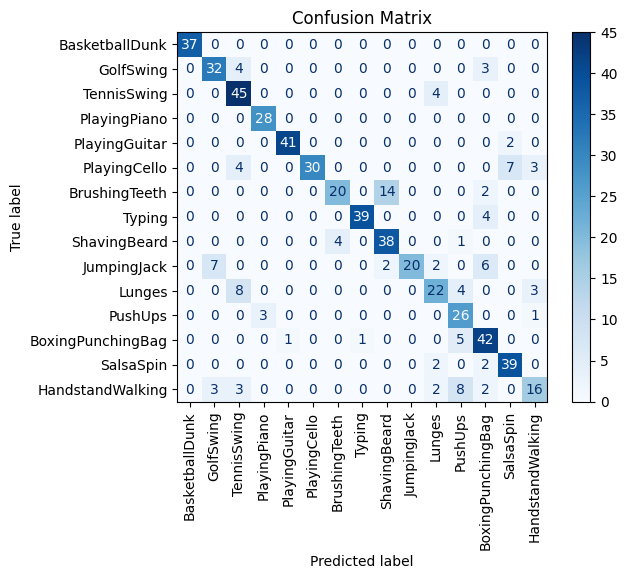


📋 Classification Report:
                   precision    recall  f1-score   support

   BasketballDunk       1.00      1.00      1.00        37
        GolfSwing       0.76      0.82      0.79        39
      TennisSwing       0.70      0.92      0.80        49
     PlayingPiano       0.90      1.00      0.95        28
    PlayingGuitar       0.98      0.95      0.96        43
     PlayingCello       1.00      0.68      0.81        44
    BrushingTeeth       0.83      0.56      0.67        36
           Typing       0.97      0.91      0.94        43
     ShavingBeard       0.70      0.88      0.78        43
      JumpingJack       1.00      0.54      0.70        37
           Lunges       0.69      0.59      0.64        37
          PushUps       0.59      0.87      0.70        30
BoxingPunchingBag       0.69      0.86      0.76        49
        SalsaSpin       0.81      0.91      0.86        43
 HandstandWalking       0.70      0.47      0.56        34

         accuracy           

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load best weights saved during training
model.load_state_dict(best_model_wts)  # Load best model saved during training
model.eval()

def evaluate_model(model, val_loader, class_names):
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for videos, labels in val_loader:
            videos = videos.to(device)
            labels = labels.to(device)
            outputs = model(videos)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Accuracy
    acc = accuracy_score(all_labels, all_preds)
    print(f"\n🔎 Validation Accuracy: {acc * 100:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds, labels=list(range(len(class_names))))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(xticks_rotation=90, cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()

    # Classification Report
    print("\n📋 Classification Report:")
    print(classification_report(
        all_labels,
        all_preds,
        labels=list(range(len(class_names))),
        target_names=class_names,
        zero_division=0
    ))

# 🔧 Usage (after loading best model)
evaluate_model(model, val_loader, list(class_to_idx.keys()))


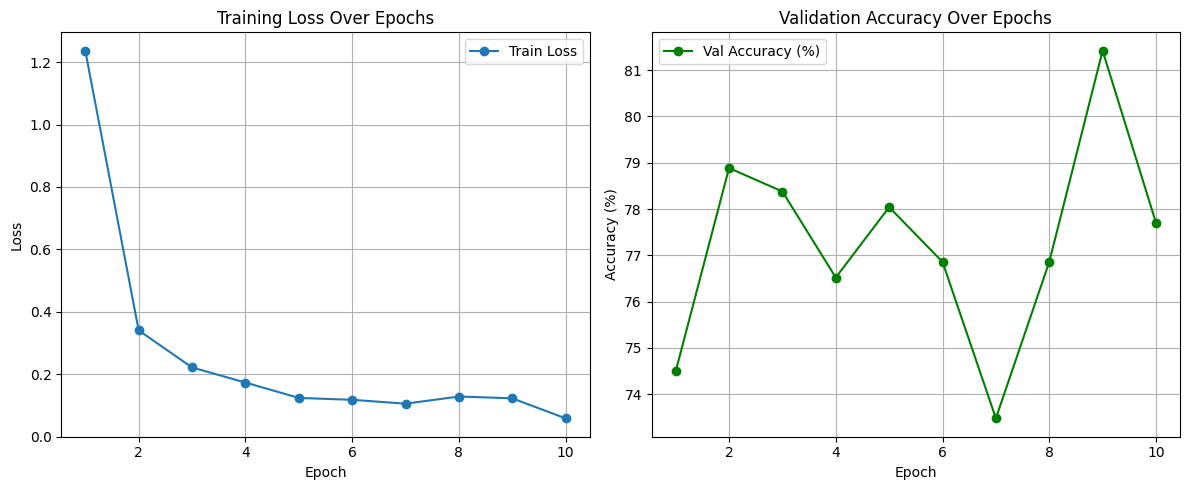

In [ ]:
# Plot Training Loss
import matplotlib.pyplot as plt

def plot_dl_performance(train_losses, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12,5))

    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, marker='o', label='Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.grid(True)
    plt.legend()

    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_accuracies, marker='o', color='green', label='Val Accuracy (%)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Validation Accuracy Over Epochs')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call this function with your recorded metrics
plot_dl_performance(train_losses, val_accuracies)

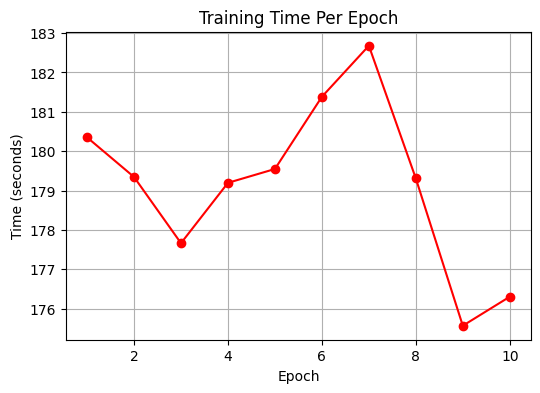

In [ ]:
# Training Time per Epoch

def plot_training_time(epoch_times):
    epochs = range(1, len(epoch_times) + 1)
    plt.figure(figsize=(6,4))
    plt.plot(epochs, epoch_times, marker='o', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Time (seconds)')
    plt.title('Training Time Per Epoch')
    plt.grid(True)
    plt.show()

plot_training_time(epoch_times)

In [ ]:
# Show predicted classes for sample test videos

def show_sample_predictions(model, val_loader, class_names, num_samples=5):
    model.eval()
    shown = 0
    with torch.no_grad():
        for videos, labels in val_loader:
            videos = videos.to(device)
            outputs = model(videos)
            _, preds = torch.max(outputs, 1)

            for i in range(len(videos)):
                print(f"Actual: {class_names[labels[i].item()]} | Predicted: {class_names[preds[i].item()]}")
                shown += 1
                if shown >= num_samples:
                    return

# Usage:
show_sample_predictions(model, val_loader, list(class_to_idx.keys()))


Actual: BasketballDunk | Predicted: BasketballDunk
Actual: BasketballDunk | Predicted: BasketballDunk
Actual: BasketballDunk | Predicted: BasketballDunk
Actual: BasketballDunk | Predicted: BasketballDunk
Actual: BasketballDunk | Predicted: BasketballDunk
